# Comparing Classifiers for Building Classification Models

In this notebook, I will be comparing different classifiers for building classification models

##1. Make synthetic dataset

###1.1 Import libraries

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#for building classification model
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

#adding color to the model
import seaborn as sns

###1.2 Generating the dataset


In [ ]:
x,y =make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)
# this creates a synthetic dataset with 1000 samples, 2 classes, 5 features, random sate 1 and 0 redundancy

###1.3 Let's examine the data dimension

In [ ]:
x.shape

(1000, 5)

In [ ]:
y.shape

(1000,)

##2. Data split(80/20 ratio)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

###2.1 Examining the data Dimension

In [ ]:
x_train.shape, y_train.shape

((800, 5), (800,))

In [ ]:
x_test.shape, y_test.shape

((200, 5), (200,))

The x and y train will be used to generate the ML model. Then we will apply the model to make a prediction using the x test

##3. Building the Classification Model

###3.1 Defining learning classifiers

In [ ]:
names = ["Nearest_Neighbors", 'Linear_SVM', 'Polynomial_SVM', 'RBF_SVM', 'Gaussian_Process', 'Gradient_Boosting', 'Decision_Tree', 'Extra_Trees', 'Random_Forest', 'Neural_Net', 'AdaBoost',
         'Naive_Bayes', 'QDA', 'SGD']

classifiers = [KNeighborsClassifier(3),
               SVC(kernel='linear', C=0.025),
               SVC(kernel='poly', degree=3, C=.025),
               SVC(kernel='rbf', C=1, gamma=2),
               GaussianProcessClassifier(1.0 * RBF(1.0)),
               GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
               DecisionTreeClassifier(max_depth=5),
               ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
               RandomForestClassifier(max_depth=5, n_estimators=100),
               MLPClassifier(alpha=1, max_iter=1000),
               AdaBoostClassifier(n_estimators=1000),
               GaussianNB(),
               QuadraticDiscriminantAnalysis(),
               SGDClassifier(loss='hinge', penalty='l2')]


###3.2 Building the Model, Apllying the Model on test data and record Accuracy Scores

In [ ]:
#iterate using a for loop the classifiers.
scores = []     #empty scores variable
for name, clf in zip(names, classifiers):
  clf.fit(x_train, y_train)
  score = clf.score(x_test, y_test)
  scores.append(score)

In [ ]:
scores

[0.805,
 0.835,
 0.84,
 0.8,
 0.835,
 0.79,
 0.835,
 0.79,
 0.825,
 0.84,
 0.83,
 0.85,
 0.835,
 0.835]

###4.2 Create a data frame of the model performance

In [ ]:
df = pd.DataFrame()  #create an empty data frame
#to table the names and score
df['name']= names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.805
1,Linear_SVM,0.835
2,Polynomial_SVM,0.840
3,RBF_SVM,0.800
4,Gaussian_Process,0.835
5,Gradient_Boosting,0.790
6,Decision_Tree,0.835
7,Extra_Trees,0.790
8,Random_Forest,0.825
9,Neural_Net,0.840


###4.3 Adding colors to the dataframe.

This will help in quickly identifying the different performance of the models. The model with the least performace will have light shades.

In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.805000
1,Linear_SVM,0.835000
2,Polynomial_SVM,0.840000
3,RBF_SVM,0.800000
4,Gaussian_Process,0.835000
5,Gradient_Boosting,0.790000
6,Decision_Tree,0.835000
7,Extra_Trees,0.790000
8,Random_Forest,0.825000
9,Neural_Net,0.840000


###4.3 Alternatively, use a Bar plot for the model performance

/tmp/ipython-input-2011503177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plt=sns.barplot(y='name', x='score', data=df, palette='viridis')


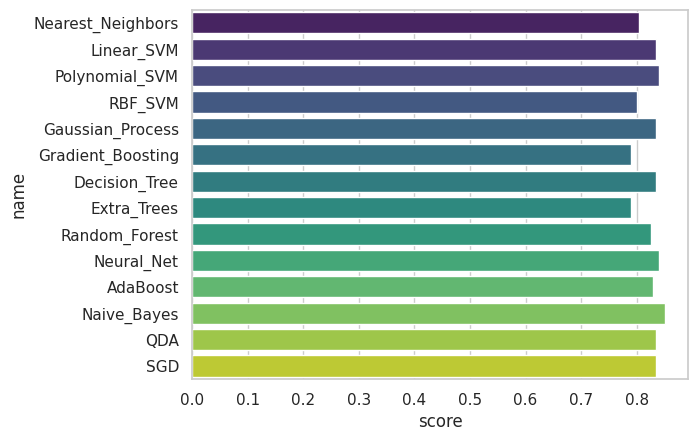

In [ ]:
sns.set(style='whitegrid')
plt=sns.barplot(y='name', x='score', data=df, palette='viridis')

This concludes and shows the different performances of different classification models